Colab🤩 -> https://drive.google.com/file/d/1W4xGuzlnOOyDu7NwsICSgn86P_vnvz2c/view?usp=sharing

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import display

In [37]:
# Данные для спектра неона
neon_data = {
    'Цвет линии (неон)': [
        'Ярко-красная', 'Красно-оранжевая', 'Оранжевая первая', 
        'Желтая', 'Светло-зеленая', 'Сине-зеленая'
    ],
    'Длина волны (нм)': [640.2, 614.3, 594.5, 585.2, 576.0, 486.1],
    'Деления барабана': [2636, 2546, 2512, 2398, 2136, 2112]
}

df_neon = pd.DataFrame(neon_data)

# Данные для спектра ртути
mercury_data = {
    'Цвет линии (ртуть)': [
        'Красная', 'Оранжевая', 'Желтая левая', 
        'Желтая правая', 'Зеленая', 'Синяя', 'Фиолетовая'
    ],
    'Длина волны (нм)': [690.7, 623.2, 579.0, 577.0, 446.1, 435.8, 404.7],
    'Деления барабана': [2612, 2458, 2382, 2368, 2082, 1576, 1102]
}

df_mercury = pd.DataFrame(mercury_data)

display(df_neon)
display(df_mercury)

,Цвет линии (неон),Длина волны (нм),Деления барабана
0,Ярко-красная,640.2,2636
1,Красно-оранжевая,614.3,2546
2,Оранжевая первая,594.5,2512
3,Желтая,585.2,2398
4,Светло-зеленая,576.0,2136
5,Сине-зеленая,486.1,2112


,Цвет линии (ртуть),Длина волны (нм),Деления барабана
0,Красная,690.7,2612
1,Оранжевая,623.2,2458
2,Желтая левая,579.0,2382
3,Желтая правая,577.0,2368
4,Зеленая,446.1,2082
5,Синяя,435.8,1576
6,Фиолетовая,404.7,1102


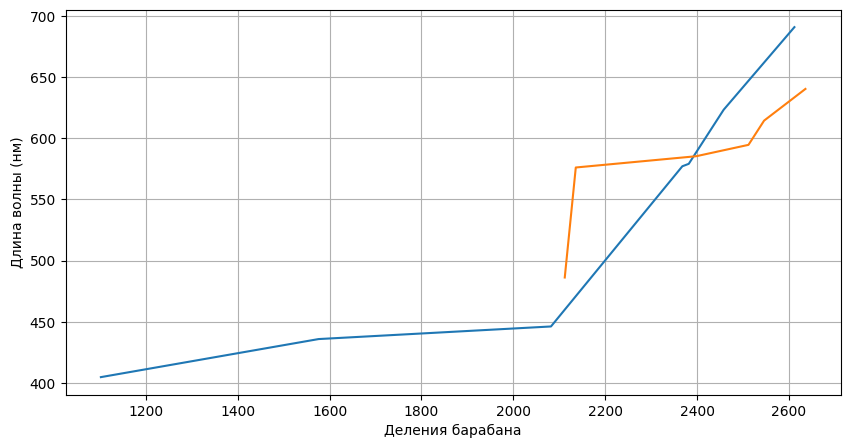

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=df_mercury, y="Длина волны (нм)", x="Деления барабана", ax=ax)
sns.lineplot(data=df_neon, y = "Длина волны (нм)", x="Деления барабана", ax=ax)
plt.grid()

# Осталось только сгладить!!!

In [50]:
Variance = []
for i in range(df_mercury.shape[0]):
	if i == df_mercury.shape[0]-1:
		break
	else:
		Variance.append(0.1 * ((df_mercury["Деления барабана"][i] - df_mercury["Деления барабана"][i+1])/360))

tmp = pd.DataFrame(Variance) 
Variance = []

for i in range(df_neon.shape[0]):
	if i == df_neon.shape[0]-1:
		break
	else:
		Variance.append(0.1 * ((df_neon["Деления барабана"][i] - df_neon["Деления барабана"][i+1])/360))

tmp["D_fi_mer"] = tmp
tmp = tmp.drop([0],axis = 1)

tmp["D_l_mer"] = tmp["D_fi_mer"].apply(lambda x: 4.9 * x)
tmp = tmp.apply(lambda x: x)

# neon
Variance = pd.DataFrame(Variance) 
Variance["D_fi_neon"] = Variance
Variance = Variance.drop([0], axis = 1)
Variance["D_l_neon"] = Variance["D_fi_neon"].apply(lambda x: 4.9 * x)

Variance = pd.merge(tmp, Variance, right_index=True, left_index=True, how = "outer")
Variance["lambda mercury"] = df_mercury["Длина волны (нм)"]
Variance["lambda neon"] = df_neon["Длина волны (нм)"]

Variance.T

,0,1,2,3,4,5
D_fi_mer,0.042778,0.021111,0.003889,0.079444,0.140556,0.131667
D_l_mer,0.209611,0.103444,0.019056,0.389278,0.688722,0.645167
D_fi_neon,0.025000,0.009444,0.031667,0.072778,0.006667,NaN
D_l_neon,0.122500,0.046278,0.155167,0.356611,0.032667,NaN
lambda mercury,690.700000,623.200000,579.000000,577.000000,446.100000,435.800000
lambda neon,640.200000,614.300000,594.500000,585.200000,576.000000,486.100000


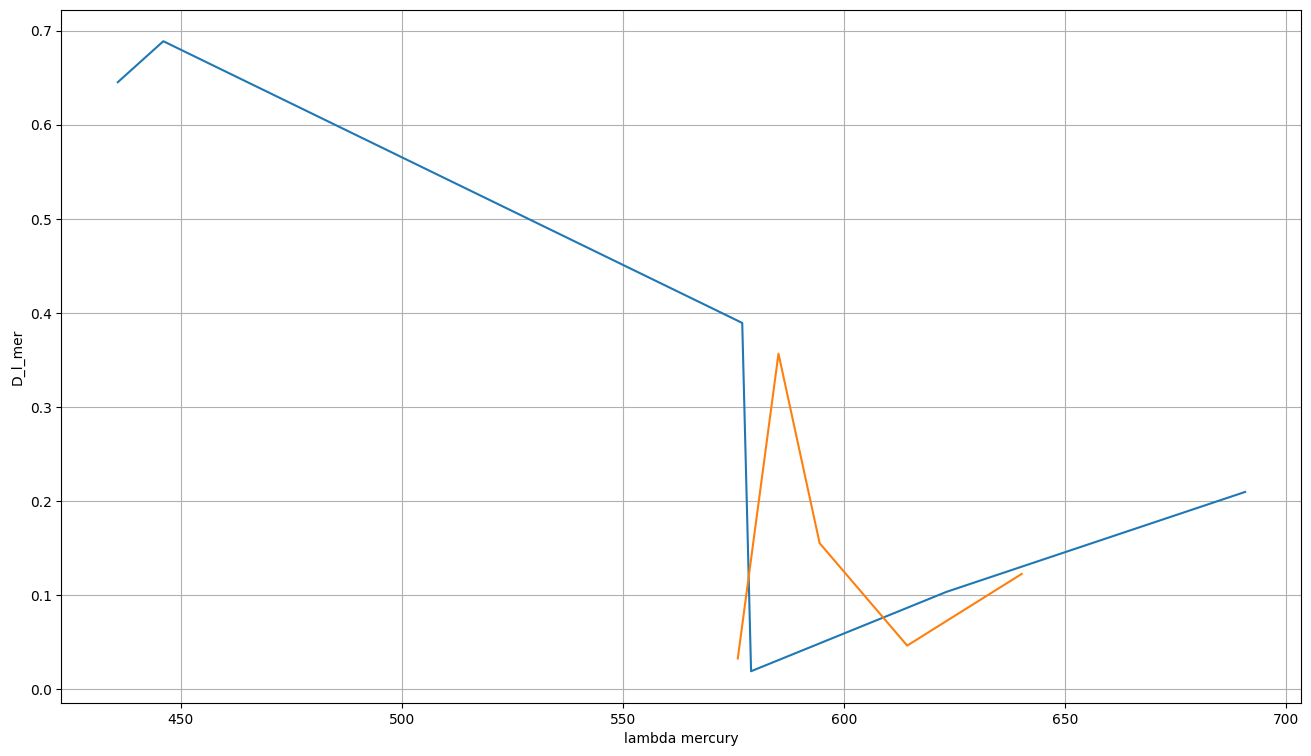

In [52]:
fig, ax = plt.subplots(figsize=(16, 9))

sns.lineplot(x="lambda mercury", y="D_l_mer", data=Variance, ax=ax)
sns.lineplot(x="lambda neon", y="D_l_neon", data=Variance, ax=ax)
plt.grid()